In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve


sns.set()
pd.set_option("chained_assignment", None)

In [2]:
raw = pd.read_csv(r"adult.csv")
processed = pd.read_csv(r"processed_adult.csv")

In [3]:
raw.head()

,age,sector,education,education_num,marrital_status,occupation,relationship,race,gender,capital_gain,capital_loss,work_hrs,nation,sallary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
for i in raw.drop(columns=['age', 'capital_gain', 'capital_loss', 'work_hrs']):
    
    le = LabelEncoder()
    raw[i] = le.fit_transform(raw[i])

In [5]:
raw.head()

,age,sector,education,education_num,marrital_status,occupation,relationship,race,gender,capital_gain,capital_loss,work_hrs,nation,sallary
0,39,7,9,12,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,12,2,4,0,4,1,0,0,13,39,0
2,38,4,11,8,0,6,1,4,1,0,0,40,39,0
3,53,4,1,6,2,6,0,2,1,0,0,40,39,0
4,28,4,9,12,2,10,5,2,0,0,0,40,5,0


In [6]:
X = raw.drop(columns=['sallary'])
y = raw.sallary

In [7]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [8]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [9]:
print("Test AUC:", roc_auc_score(y_test, pred))
print("Test Accuracy:", accuracy_score(y_test, pred))
print("Test Precision", precision_score(y_test, pred))
print("Test Recall:", recall_score(y_test, pred))
print("Test F1 score:", f1_score(y_test, pred))

Test AUC: 0.7464803804097995
Test Accuracy: 0.8141058450199611
Test Precision 0.6054191363251482
Test Recall: 0.6179775280898876
Test F1 score: 0.611633875106929


In [10]:
confusion_matrix(y_test, pred)

array([[6523,  932],
       [ 884, 1430]], dtype=int64)

In [11]:
y_test[:10]

14160    0
27048    0
28868    1
5667     0
7827     0
15382    1
4641     1
8943     0
216      0
5121     1
Name: sallary, dtype: int32

In [12]:
pred[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

c:\Users\BHernandez\Anaconda3\envs\condaVenv1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


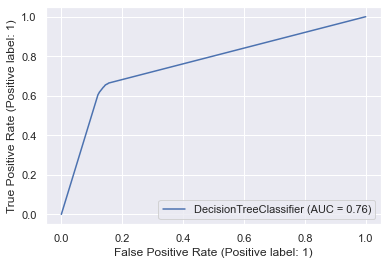

In [13]:
plot_roc_curve(clf, X_test, y_test)

#### Tune Hyper Parameters with GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV
import graphviz

In [15]:
np.random.seed(42)
Tree = DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"], 
              "min_impurity_decrease":[0.0, 0.1, 0.2, 0.3],
              "max_depth":[None, 5, 10, 15, 20],
              "min_samples_leaf":list(range(2, 9, 2)),
              "max_leaf_nodes":list(range(10, 51, 10)),
              "max_features":[5, 10, 12]
              }

clf = GridSearchCV(Tree, parameters, scoring="roc_auc",
                   n_jobs=4, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [5, 10, 12],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
                         'min_samples_leaf': [2, 4, 6, 8]},
             scoring='roc_auc')

In [16]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=10, max_leaf_nodes=50,
                       min_samples_leaf=4)

In [17]:
clf.best_score_

0.9045924956914074

In [18]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': 50,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4}

In [19]:
bestTree = DecisionTreeClassifier(criterion="entropy", max_depth=None, max_features=10,
                                  max_leaf_nodes=50, min_impurity_decrease=0, min_samples_leaf=4)
bestTree.fit(X_train, y_train)
bestPred = bestTree.predict(X_test)
bestProb = bestTree.predict_proba(X_test)

In [20]:
print("Test AUC:", roc_auc_score(y_test, bestProb[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, bestPred))
print("Test Precision", precision_score(y_test, bestPred))
print("Test Recall:", recall_score(y_test, bestPred))
print("Test F1 score:", f1_score(y_test, bestPred))

Test AUC: 0.9021387327131907
Test Accuracy: 0.8521854846964889
Test Precision 0.7614182692307693
Test Recall: 0.5475367329299914
Test F1 score: 0.6370035193564606


In [21]:
confusion_matrix(y_test, bestPred)

array([[7058,  397],
       [1047, 1267]], dtype=int64)

c:\Users\BHernandez\Anaconda3\envs\condaVenv1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


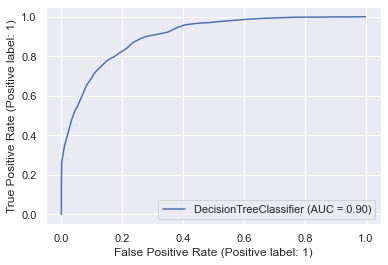

In [22]:
plot_roc_curve(bestTree, X_test, y_test)

In [23]:
bestPred[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [24]:
y_test[:10]

14160    0
27048    0
28868    1
5667     0
7827     0
15382    1
4641     1
8943     0
216      0
5121     1
Name: sallary, dtype: int32

[Text(0.5261363636363636, 0.9545454545454546, 'X[6] <= 0.5\nentropy = 0.799\nsamples = 22792\nvalue = [17265, 5527]'),
 Text(0.28863636363636364, 0.8636363636363636, 'X[9] <= 5095.5\nentropy = 0.993\nsamples = 9286\nvalue = [5109, 4177]'),
 Text(0.27045454545454545, 0.7727272727272727, 'X[3] <= 11.5\nentropy = 0.973\nsamples = 8544\nvalue = [5099, 3445]'),
 Text(0.12272727272727273, 0.6818181818181818, 'X[3] <= 6.5\nentropy = 0.876\nsamples = 6143\nvalue = [4324, 1819]'),
 Text(0.05454545454545454, 0.5909090909090909, 'X[0] <= 66.5\nentropy = 0.491\nsamples = 933\nvalue = [833, 100]'),
 Text(0.03636363636363636, 0.5, 'X[0] <= 36.5\nentropy = 0.523\nsamples = 849\nvalue = [749, 100]'),
 Text(0.01818181818181818, 0.4090909090909091, 'entropy = 0.263\nsamples = 247\nvalue = [236, 11]'),
 Text(0.05454545454545454, 0.4090909090909091, 'X[10] <= 1779.5\nentropy = 0.604\nsamples = 602\nvalue = [513, 89]'),
 Text(0.03636363636363636, 0.3181818181818182, 'entropy = 0.577\nsamples = 590\nvalue =

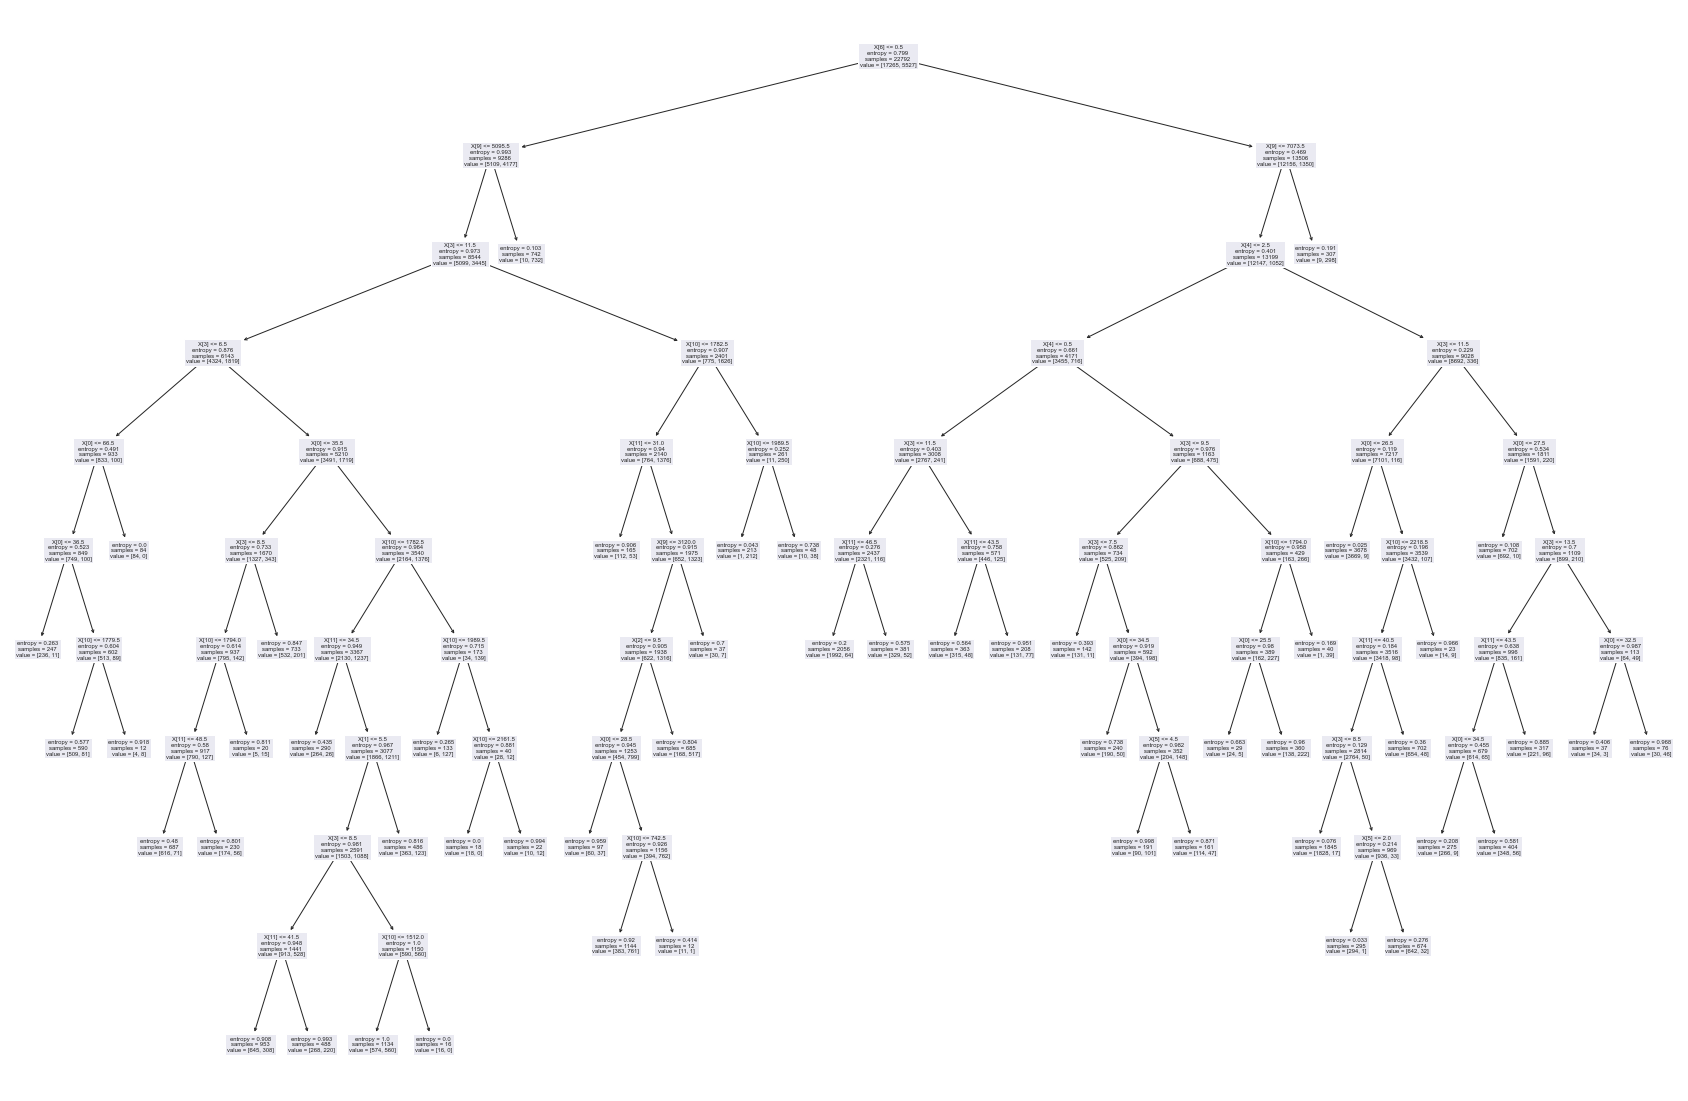

In [25]:
plt.figure(figsize=(30,20))
tree.plot_tree(bestTree)

#### Now try RandomForest

In [26]:
manyTrees = RandomForestClassifier()

params = {
    "n_estimators":[10, 50, 100, 200],
    "criterion":["gini", "entropy"],
    "max_samples":[0.25, 0.5, 0.75, None],
    "max_features":[5, 9, 13],
    "max_depth":[5, 15, 20, None]
}

clf = GridSearchCV(manyTrees, param_grid=params, cv=5, n_jobs=6, scoring="roc_auc")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 20, None],
                         'max_features': [5, 9, 13],
                         'max_samples': [0.25, 0.5, 0.75, None],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [27]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=5,
                       max_samples=0.5, n_estimators=200)

In [28]:
clf.best_score_

0.917703316871472

In [29]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 5,
 'max_samples': 0.5,
 'n_estimators': 200}

In [30]:
bestTrees = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=5, max_samples=0.75, n_estimators=200)
bestTrees.fit(X_train, y_train)
treesPred = bestTrees.predict(X_test)
treesProb = bestTrees.predict_proba(X_test)

In [31]:
print("Test AUC:", roc_auc_score(y_test, treesProb[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, treesPred))
print("Test Precision", precision_score(y_test, treesPred))
print("Test Recall:", recall_score(y_test, treesPred))
print("Test F1 score:", f1_score(y_test, treesPred))

Test AUC: 0.9139854975430224
Test Accuracy: 0.8628314054662709
Test Precision 0.7669956140350878
Test Recall: 0.6045808124459809
Test F1 score: 0.6761720637989366


In [32]:
confusion_matrix(y_test, treesPred)

array([[7030,  425],
       [ 915, 1399]], dtype=int64)

c:\Users\BHernandez\Anaconda3\envs\condaVenv1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


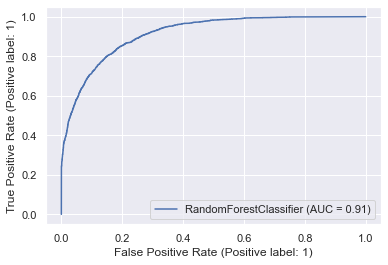

In [33]:
plot_roc_curve(bestTrees, X_test, y_test)

#### Now try Gradient Boosting

In [43]:
gBoost = GradientBoostingClassifier()

params = {
    'loss':['deviance', 'exponential'],
    'learning_rate':[0.001, 0.01, 0.1],
    'n_estimators':[50, 100, 200],
    'subsample':[0.25, 0.5, 0.75, 1.0],
    'max_depth':[3, 5, 8],
    'max_features':[5, 9, 13],
    'random_state':[42]
}

clf = GridSearchCV(gBoost, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5, 8], 'max_features': [5, 9, 13],
                         'n_estimators': [50, 100, 200], 'random_state': [42],
                         'subsample': [0.25, 0.5, 0.75, 1.0]},
             scoring='roc_auc')

In [35]:
clf.best_score_

0.9288972532748575

In [36]:
clf.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 13,
 'n_estimators': 200,
 'random_state': 42,
 'subsample': 1.0}

In [37]:
bestGB = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', max_depth=5,
                                    max_features=13, n_estimators=200, subsample=1.0, random_state=42)
bestGB.fit(X_train, y_train)
GBpred = bestGB.predict(X_test)
GBprob = bestGB.predict_proba(X_test)

In [38]:
print("Test AUC:", roc_auc_score(y_test, GBprob[:, 1]))
print("Test Accuracy:", accuracy_score(y_test, GBpred))
print("Test Precision", precision_score(y_test, GBpred))
print("Test Recall:", recall_score(y_test, GBpred))
print("Test F1 score:", f1_score(y_test, GBpred))

Test AUC: 0.9259001140232347
Test Accuracy: 0.8755246186917801
Test Precision 0.7753259779338014
Test Recall: 0.6681071737251513
Test F1 score: 0.7177344475394616


In [39]:
confusion_matrix(y_test, GBpred)

array([[7007,  448],
       [ 768, 1546]], dtype=int64)

c:\Users\BHernandez\Anaconda3\envs\condaVenv1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


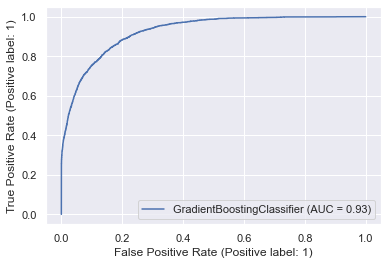

In [40]:
plot_roc_curve(bestGB, X_test, y_test)

In [41]:
y_test[:10]

14160    0
27048    0
28868    1
5667     0
7827     0
15382    1
4641     1
8943     0
216      0
5121     1
Name: sallary, dtype: int32

In [42]:
GBpred[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])